## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
print('the number of rows in the dataset is = '+str(df.shape[0]))

the number of rows in the dataset is = 294478


c. The number of unique users in the dataset.

In [4]:
number_of_unique_users=df.user_id.nunique()
number_of_unique_users
print('number_of_unique_users is = '+str(number_of_unique_users))

number_of_unique_users is = 290584


d. The proportion of users converted.

In [5]:
converted_user=df.query('converted==1').user_id.nunique()
print('The proportion of users converted   {0:.2%}'.format((converted_user/number_of_unique_users)))

The proportion of users converted   12.10%


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
new_page_control=df.query('landing_page=="new_page"and group!="treatment"').count()[0]
old_page_treatment=df.query('landing_page=="old_page"and group=="treatment"').count()[0]
print("The number of times the new_page and treatment don't line up.  {}".format(new_page_control+old_page_treatment))

The number of times the new_page and treatment don't line up.  3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2=df.query("landing_page=='new_page' and group=='treatment' or landing_page=='old_page'and group=='control'")


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()
print('number_of_unique_users is = '+str(df2.user_id.nunique()))

number_of_unique_users is = 290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated(keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
the_repeat_user_id=df2[df2['user_id']==773192] 
the_repeat_user_id

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop(df2[(df2.user_id == 773192) & (df2['timestamp'] == '2017-01-14 02:55:59.590927')].index)
df2[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
total_converted=df2.converted.sum()
probaility_converted=df2.converted.sum()/df2.converted.shape[0]
print('probability of an individual converting regardless of the page they receive  {0:.2%}'.format(df2.converted.sum()/df2.converted.shape[0]))

probability of an individual converting regardless of the page they receive  11.96%


b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df_control=df2[df2['group']=="control"]
total_control=df_control.count()[0]
probability_of_control=total_control/df2.group.shape[0]
print('probability_of_control  {0:.2%}'.format(total_control/df2.group.shape[0]))
number_control_converted=df_control[df_control['converted']==1].count()[0]
number_control_not_converted=df_control[df_control['converted']==0].count()[0]
probability_control_converted=number_control_converted/total_control
probability_control_not_converted=number_control_not_converted/total_control
print('probability_control_converted   {0:.2%}'.format(number_control_converted/total_control))
print('probability_control_not_converted   {0:.2%}'.format(number_control_not_converted/total_control))


probability_of_control  49.99%
probability_control_converted   12.04%
probability_control_not_converted   87.96%


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df_treatment=df2[df2['group']=="treatment"]
total_treatment=df_treatment.count()[0]
probability_of_treatment=total_treatment/df2.group.shape[0]
print('probability_of_treatment  {0:.2%}'.format(total_treatment/df2.group.shape[0]))
number_treatment_converted=df_treatment[df_treatment['converted']==1].count()[0]
number_treatment_not_converted=df_treatment[df_treatment['converted']==0].count()[0]
probability_treatment_converted=number_treatment_converted/total_treatment
probability_treatment_not_converted=number_treatment_not_converted/total_treatment
print('probability_treatment_converted   {0:.2%}'.format(number_treatment_converted/total_treatment))
print('probability_treatment_not_converted   {0:.2%}'.format(number_treatment_not_converted/total_treatment))


probability_of_treatment  50.01%
probability_treatment_converted   11.88%
probability_treatment_not_converted   88.12%


d. What is the probability that an individual received the new page?

In [17]:
print("The probability that an individual received the new page is {0:.2%}".format(df2.query('landing_page=="new_page"').count()[0]/df2.landing_page.count()))

The probability that an individual received the new page is 50.01%


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

In [18]:
print('start date of trail  {}'.format(np.sort(df2.timestamp)[0]))
print('last date of trail   {}'.format(np.sort(df2.timestamp)[-1]))

start date of trail  2017-01-02 13:42:05.378582
last date of trail   2017-01-24 13:41:54.460509


**Your answer goes here.**

# ***conclousion***


<div class="alert alert-block alert-info">
<b>sice probability of an individual converting regardless of the page they receive  11.96% , probability of converted individuals who was in the control group is 12.04% , for treatment group is 11.88% and  probability of individuals who  received the new page is 50.01% so there is no evidence for the company to understand if they should implement the new page, keep the old page, but perhaps run the experiment longer to make decision since the experiment duration just only 22 days and this very short period to overcome the effect of factors as Novelty effect and change aversion when existing users first experience a change Sufficient traffic and conversions to have significant and repeatable results need Long enough run time for the experiment to account for changes in behavior based on time also there is no Practical significance of a conversion rate (the cost of launching a newpage vs. the gain from the increase in conversion)help the companey to make right deciesion 
</b>
</div>



<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.**

 `1.`assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%
 
# `a.` null  hypotheses    

## $$H_0: p_{new} - p_{old} \leq 0$$

# `b.` alternative hypotheses 

## $$H_1:  p_{new} - p_{old}> 0$$


### ***$p_{old}$*** and ***$p_{new}$***, are the converted rates for the old and new pages

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [19]:
# p_old=p_new=converted rate regadless of page
# so converted rate regadless of page
converted_rate_regadless_of_page=round(df2.query('converted==1').converted.sum()/len(df2.converted),4)
p_new=converted_rate_regadless_of_page
print('the convert rate for 𝑝𝑛𝑒𝑤  under the null is = '+str(p_new))

the convert rate for 𝑝𝑛𝑒𝑤  under the null is = 0.1196


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [20]:
p_old=round(df2.query('converted==1').converted.sum()/len(df2.converted),4)
print('the convert rate for  𝑝𝑜𝑙𝑑  under the null is = '+str(p_old))

the convert rate for  𝑝𝑜𝑙𝑑  under the null is = 0.1196


c. What is $n_{new}$?

In [21]:
n_new=df2.query('landing_page=="new_page"')['user_id'].nunique()
print('𝑛 𝑛𝑒𝑤 is = '+str(n_new))

𝑛 𝑛𝑒𝑤 is = 145310


d. What is $n_{old}$?

In [22]:
n_old=df2.query('landing_page=="old_page"')['user_id'].nunique()
print('𝑛 old is = '+str(n_old))

𝑛 old is = 145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [23]:
new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [24]:
old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [25]:
#Compute the probablity of new page converted rate
new_page_converted.mean()
#Compute the probablity of old page converted rate
old_page_converted.mean()
#Find  p_new  -  p_old  for your simulated values from part (e) and (f).
print('p_new - p_old for simulated values from part (e) and (f) is = '+str(new_page_converted.mean() - old_page_converted.mean()))    

p_new - p_old for simulated values from part (e) and (f) is = 0.0013715604168162976


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [26]:
# Create sampling distribution for difference in conversion rates
# with boostrapping
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    samp = df2.sample(size, replace = True)
    new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
    old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

In [27]:
p_diffs = np.array(p_diffs)
p_diffs

array([-0.00034901,  0.00010538,  0.00018075, ..., -0.00123   ,
        0.00042189, -0.00011492])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   3.,   45.,  371., 1386., 2846., 2959., 1767.,  526.,   91.,
           6.]),
 array([-0.00500154, -0.00402695, -0.00305236, -0.00207777, -0.00110318,
        -0.00012859,  0.00084601,  0.0018206 ,  0.00279519,  0.00376978,
         0.00474437]),
 <a list of 10 Patch objects>)

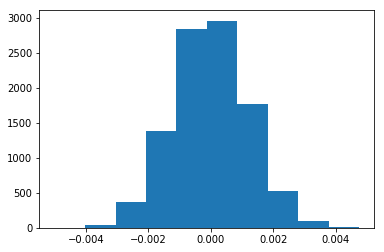

In [28]:
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
# Create number of users with all new_page users and all old_page users
convert_new =df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()
convert_old =df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()
print('convert_new = {}'.format(df2.query('converted == 1 and landing_page == "new_page"')['user_id'].nunique()))
print('convert_old = {}'.format(df2.query('converted == 1 and landing_page == "old_page"')['user_id'].nunique()))


# Compute actual converted rate
actual_cvt_new = convert_new/ n_new 
actual_cvt_old = convert_old/ n_old
print('actual_cvt_new = {}'.format(round(convert_new/ n_new,4))) 
print('actual_cvt_old = {}'.format(round(convert_old/ n_old,4)))

# Compute observed difference in converted rate 
obs_diff = actual_cvt_new - actual_cvt_old
print('obs_diff = {}'.format(round(obs_diff,4)))

convert_new = 17264
convert_old = 17489
actual_cvt_new = 0.1188
actual_cvt_old = 0.1204
obs_diff = -0.0016


In [30]:
# create distribution under the null hypothesis
size = df.shape[0]
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)
null_vals

array([ 3.09075819e-04,  6.13436353e-05, -1.59146682e-03, ...,
       -2.63167286e-04,  8.24560871e-04,  2.33958098e-03])

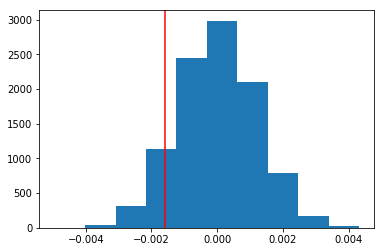

In [31]:
#Plot Null distribution
plt.hist(null_vals)
#Plot vertical line for observed statistic
plt.axvline(x=obs_diff,color ='red');


In [32]:
#Compute proportion of the p_diffs are greater than the actual difference observed in ab_data.csv
(null_vals > obs_diff).mean()
print('proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is = '+str((null_vals > obs_diff).mean()))

proportion of the p_diffs are greater than the actual difference observed in ab_data.csv is = 0.908


k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**

<div class="alert alert-block alert-info">
<b> P-Value is this value called in scientific studies<br>
    P-Value:is The probability of observing our statistic or a more extreme statistic from the null hypothesis<br>
    P-Value:is the proportion of values in the null distribution that were greater than our observed difference</b>
</div>

`1.-` <div class="alert alert-block alert-success">
<b>part i contains the sampling distribution under the null hypothesis,where conversion rate of the control group is equal to the conversion rate of the treatment group.<br></b> 
</div>

`2.-` <div class="alert alert-block alert-success">
<b>Part j involves calculating proportion of the conversion rate differences where proportion of the p_diffs are greater than the actual difference observed in ab_data.csv <br></b> 
</div>

`3.-` <div class="alert alert-block alert-success">
<b>low p-value (specifically, less than our alpha of 0.05) indicates that the null hypothesis is not likely to be true. Since the p-value is very large 0.905, it is likely that our statistic is from the null, and therefore we<br></b> 
</div> 

##### ***`fail to reject the null hypothesis`***. 

##### ***`Type I error rate of 5%, and P_old > Alpha, we fail to reject the null.`***



l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm
#convert_old = 
print('the number of conversions for old page  = {}'.format(convert_old))
#convert_new = 
print('the number of conversions for new page  = {}'.format(convert_new))
#n_old = 
print('number of individuals who received old page which is : n_old = {}'.format(n_old))
#n_new = 
print('number of individuals who received new page which is : n_new= {}'.format(n_new))

the number of conversions for old page  = 17489
the number of conversions for new page  = 17264
number of individuals who received old page which is : n_old = 145274
number of individuals who received new page which is : n_new= 145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [34]:
z_score, p_value = sm.stats.proportions_ztest(np.array([convert_new,convert_old]),np.array([n_new,n_old]), alternative = 'larger')
print('1- z_score ={}  and  p_value = {}'.format(round(z_score,4),round(p_value,4)))
print('==============================================================================')
print("2- it's a one tail test so a z-score past 1.96 will be significant.")
print('==============================================================================')



1- z_score =-1.3109  and  p_value = 0.9051
2- it's a one tail test so a z-score past 1.96 will be significant.


In [35]:
from scipy.stats import norm

print('Tells us how significant our z-score is = {}'.format(round(norm.cdf(z_score),6)))

print('==============================================================================')

print('Tells us what our critical value at 95% confidence is = {}'.format(norm.ppf(1-(0.05/2))))



Tells us how significant our z-score is = 0.094942
Tells us what our critical value at 95% confidence is = 1.959963984540054


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**


`1.-`

<div class="alert alert-block alert-success">
<b> Since the z_score 1.3109 does not exceed the critical value of 1.9599, we fail to reject the null hypothesis that old page users has a better or equal converted rate than old page users.<br> 
Therefore, the converted rate for new page and old page have no difference. This result is the same as parts J. and K. resul</b> 
</div>


`2.-`

<div class="alert alert-block alert-success">
<b> 
since the p_value of 0.90 (note, approximately the same value as was calculated manually) is larger than the alpha value of 0.05, we fail to reject the null hypothesis.
Thus, for both the foregoing reasons, the built-in method leads to the same conclusion as the manual method, the results of which are summarized in parts j and k, above.</b> 
</div>



<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**


`1.-`

<div class="alert alert-block alert-success">
<b> Logistic Regression, due to the fact that response variable is categorical variable</b> 
</div>

`Note`

<div class="alert alert-block alert-success">
<b>logistic regression is multiple regression but with an outcome variable that is a categorical variable and predictor variables that are continuous</b> 
</div>


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
#create a column for the intercept
df2['intercept'] = 1

#create a dummy variable column for which page each user received
df2= df2.join(pd.get_dummies(df2['landing_page']))


df2['ab_page'] = pd.get_dummies(df['group'])['treatment']
df2.head()


,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
#Create Logit regression model for conveted variable and  ab_page, and us control as baseline

lo = sm.Logit(df2['converted'], df2[['intercept','ab_page']])

result = lo.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               8.077e-06
Time:                        22:33:25   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Put your answer here.**


`1.-`

<div class="alert alert-block alert-success">
<b> The p-value associated with ab_page is 0.190</b> 
</div>


`2.-`

<div class="alert alert-block alert-success">
<b> The null in part||  is  that there is no difference between the treatment and control group.</b> 
</div> 


`3.-`

<div class="alert alert-block alert-success">
<b> Alternative hypotheses is that there is difference  between the treatment and control group</b> 
</div>


`4.-`

<div class="alert alert-block alert-success">
<b> Part II assumes the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, compared to question c-e,they have different explanatory varibale or factor for the result.</b> 
</div>



f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**


`1.-`

<div class="alert alert-block alert-success">
<b>Other factor can be the time(timestamp	variable). We can check if the converted rate depends on certain time of the day or certain day when user browerse the website.For timestamp	variable, we can further convert time as categorical variable which includes "Morning, afternoon, and evening", or "weekday and weekend".
</b> 
</div>


`2.-`

<div class="alert alert-block alert-success">
<b>Disadavantage for adding additional terms into regression model is that it will make interpretation of the model more complex and also, if new terms are dependable variable with the exisiting explanatory term, we need to add higher order term to help predict the result better.
</b> 
</div>


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


### Create the necessary dummy variables

In [40]:
# country variables that we need to make dummy variables for them
df_new['country'].unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
df_new[['CA','UK','US']].head()

,CA,UK,US
user_id,,,
834778,0,1,0
928468,0,0,1
822059,0,1,0
711597,0,1,0
710616,0,1,0


In [42]:
#df_ new with all dummies
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,CA,UK,US
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


In [43]:
# we are going to drop CA country
df_new.drop(['CA'],axis=1,inplace=True)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,1,0


In [44]:
#Create Logit regression model for conveted and country, and us CA and old page as baseline
lm = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK','US']])
result = lm.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               2.323e-05
Time:                        23:21:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
new_page      -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

In [45]:
1/np.exp(-0.0150),np.exp(0.0506),np.exp(0.0408)

(1.015113064615719, 1.0519020483004984, 1.0416437559600236)

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
#Create a new intereacton variable between new page and country US and UK
df_new['UK_new_page'] = df_new['new_page']* df_new['UK']
df_new['US_new_page'] = df_new['new_page']* df_new['US']


### Fit Your Linear Model And Obtain the Results?

In [47]:
#Create logistic regression for the intereaction variable between new page and country using dummy variable
lm_interaction = sm.Logit(df_new['converted'], df_new[['intercept','new_page','UK_new_page','US_new_page','UK','US']])
result_interaction= lm_interaction.fit()
result_interaction.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 20 Dec 2018   Pseudo R-squ.:               3.482e-05
Time:                        23:22:01   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0040      0.036    -55.008      0.000      -2.075      -1.933
new_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK_new_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
UK              0.0118      0.040      0.296      0.767      -0.066       0.090
US              0.0175      0.038      0.465      0.642      -0.056       0.091
===============================================================================
"""

In [48]:
#exponentiated the CV to inteprete the result for conclusion
np.exp(result_interaction.params)

intercept      0.134794
new_page       0.934776
UK_new_page    1.081428
US_new_page    1.048001
UK             1.011854
US             1.017682
dtype: float64

### Interpreting Result:


`1.-`

<div class="alert alert-block alert-success">
<b>From the above Logit Regression Results, we can see the coefficient of intereaction variable "UK_new_page" and "US_new_page" are different from the coefficient of new_page itself. 
</b> 
</div>



`2.-`

<div class="alert alert-block alert-success">
<b> 
only intercept's p-value is less than 0.05, which is statistically significant enough for converted rate. Other variable in the summary are not statistically significant.  
</b> 
</div>
 

`3.-`

<div class="alert alert-block alert-success">
<b> 
 Z-score for all X variables are not large enough to be significant for predicting converted rate.
</b> 
</div>
 

`4.-`

<div class="alert alert-block alert-success">
<b> 
 the country a user lives in is not significant on the converted rate considering the page the user land in. 
</b> 
</div> 

`5.-`
<div class="alert alert-block alert-success">
<b> 
For every unit for new_page decreases, convert will be 7.0% more likely to happen, holding all other varible constant.
</b> 
</div> 


`6.-`
<div class="alert alert-block alert-success">
<b> 
Convert is 1.08 times more likely to happen for UK and new page users than CA and new page users, holding all other varible constant.
</b> 
</div> 


`7.-`
<div class="alert alert-block alert-success">
<b> 
 Convert is 1.04 times more likely to happen for US and new page users than CA and new page users, holding all other varible constant.

</b> 
</div> 


`8.-`
<div class="alert alert-block alert-success">
<b> 
 Convert is 1.076 times more likely to happen for the users in US than CA, holding all other varible constant. constant.

</b> 
</div> 

`9.-`
<div class="alert alert-block alert-success">
<b> 
 Convert is 1.011 times more likely to happen for the users in Uk than CA, holding all other varible constant. constant.

</b> 
</div> 


In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
np.random.seed(42)

In [50]:
#Define X and Y variable 
x = df_new[['new_page','UK_new_page','US_new_page','UK','US']]
y = df_new['converted']
        
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [51]:
#lm = LinearRegression()
lm=LogisticRegression()
lm.fit(X_train,y_train) # fit the train data
print(lm.score(X_test,y_test))

C:\Users\zas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8789359578787983



<div class="alert alert-block alert-success">
<b> 
The score reuslt is very low, which mean the page and country dataset are not a good fit to predit converted rate .

</b> 
</div> 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.